In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset preparation

In [61]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Here class 0 is denoted by [1, 0] and class 1 is denoted by [0, 1]
y = np.array([[1, 0],
              [0, 1],
              [0, 1],
              [1, 0]])

# Layer dense

In [88]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = 0.01 * np.random.randn(1, n_neurons)

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU Activation Function

In [89]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

# Softmax Activation Function

In [90]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

# Categorical Corss Entropy Loss Function

In [91]:
class Loss_CategoricalCrossEntropy:
    def calculate(self, y_pred, y_true):
        avg_loss = self.forward(y_pred, y_true)
        return avg_loss
        
    def forward(self, y_pred, y_true):
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_predictions = y_pred_clipped[range(len(y_true)), y_true]

        if len(y_true.shape) == 2:
            correct_predictions = np.sum(y_pred*y_true, axis=1)

        neg_log = -np.log(correct_predictions)
        avg_loss = np.mean(neg_log)

        return avg_loss

In [92]:
class Accuracy:
    def calculate(self, outputs, y_true):
        correct_predictions = np.argmax(outputs, axis=1)
        
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
            
        accuracy = np.mean(correct_predictions == y_true)

        return accuracy

# Architecture and Training

In [93]:
layer1 = Layer_Dense(2, 3)
activation_relu = Activation_ReLU()
layer2 = Layer_Dense(3, 2)
activation_softmax = Activation_Softmax()

loss_function = Loss_CategoricalCrossEntropy()
accuracy_function = Accuracy()
 
best_weights_layer1 = layer1.weights.copy()
best_biases_layer1 = layer1.biases.copy()
best_weights_layer2 = layer2.weights.copy()
best_biases_layer2 = layer2.biases.copy()

network_architecture = [
    layer1,
    activation_relu,
    layer2,
    activation_softmax
]

lowest_loss = 999999

losses = []
accuracies = []

for epoch in range(10000):
    layer1.weights += 0.05 * np.random.randn(2, 3)
    layer1.biases += 0.05 * np.random.randn(1, 3)
    layer2.weights += 0.05 * np.random.randn(3, 2)
    layer2.biases += 0.05 * np.random.randn(1, 2)

    input = X
    for layer in network_architecture:
        layer.forward(input)
        input = layer.output

    softmax_outputs = input
    loss = loss_function.calculate(softmax_outputs, y)
    accuracy = accuracy_function.calculate(softmax_outputs, y)

    losses.append(loss)
    accuracies.append(accuracy)
    
    if loss<lowest_loss:
        print("New set of weights and biases found at epoch: ", epoch, "Loss: ", loss, "Accuracy: ", accuracy)
        best_weights_layer1 = layer1.weights
        best_biases_layer1 = layer1.biases
        best_weights_layer2 = layer2.weights
        best_biases_layer2 = layer2.biases
        lowest_loss = loss
    else:
        layer1.weights = best_weights_layer1.copy()
        layer1.biases = best_biases_layer1.copy()
        layer2.weights = best_weights_layer2.copy()
        layer2.biases = best_biases_layer2.copy()

New set of weights and biases found at epoch:  0 Loss:  0.6935104647386612 Accuracy:  0.5
New set of weights and biases found at epoch:  1 Loss:  0.6933478487637738 Accuracy:  0.5
New set of weights and biases found at epoch:  11 Loss:  0.6932496881519539 Accuracy:  0.5
New set of weights and biases found at epoch:  12 Loss:  0.6930211489813185 Accuracy:  0.5
New set of weights and biases found at epoch:  14 Loss:  0.6928370558590387 Accuracy:  0.5
New set of weights and biases found at epoch:  17 Loss:  0.6921899257712437 Accuracy:  0.5
New set of weights and biases found at epoch:  23 Loss:  0.6920496315724091 Accuracy:  0.5
New set of weights and biases found at epoch:  24 Loss:  0.6919097414945646 Accuracy:  0.75
New set of weights and biases found at epoch:  25 Loss:  0.6918394626188958 Accuracy:  0.5
New set of weights and biases found at epoch:  36 Loss:  0.691540058887195 Accuracy:  0.5
New set of weights and biases found at epoch:  37 Loss:  0.6903794401181083 Accuracy:  0.5
N

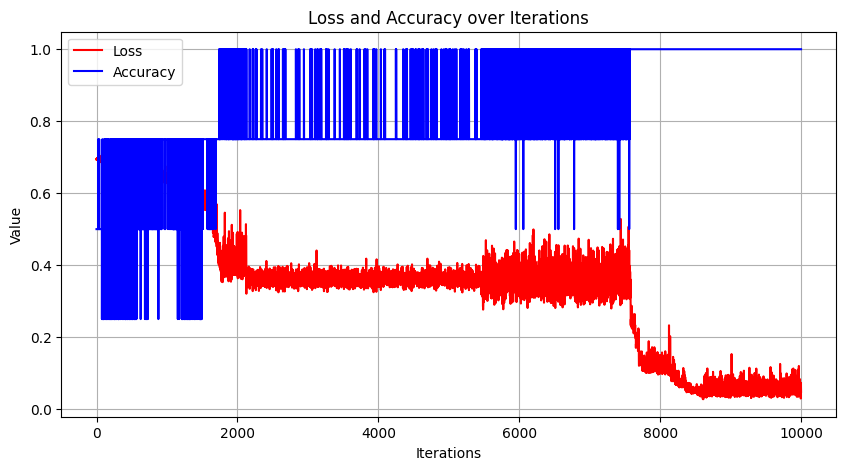

In [96]:
plt.figure(figsize=(10, 5))

plt.plot(losses, label='Loss', color='red')
plt.plot(accuracies, label='Accuracy', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Loss and Accuracy over Iterations')
plt.legend()
plt.grid(True)
plt.show()